In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from pandas import *
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [3]:
n_epochs = 6
batch_size_train = 64
batch_size_test = 10000
learning_rate = 0.01
momentum = 0.5

In [4]:
transform =transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.1307,), (0.3081,))])
train_set = datasets.MNIST('./data', download = True, train = True, transform = transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size = batch_size_train, shuffle = True, num_workers = 2)
test_set = datasets.MNIST('./data', download = True, train = False, transform = transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size = batch_size_test, shuffle = True, num_workers = 2)

Text(0.5, 1.0, 'Image of Number 7')

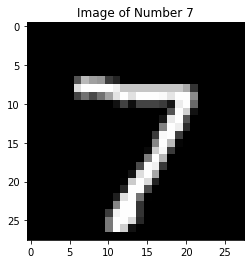

In [5]:
imshow(test_set[0][0][0],cmap = 'gray')
title('Image of Number 7')

In [6]:
class myCNN(nn.Module):
    def __init__(self, kernelSize):
        super(myCNN,self).__init__()
        self.out_channels = 5
        noc = self.out_channels
        self.conv1 = nn.Sequential(nn.Conv2d(in_channels=1, out_channels= noc, kernel_size= kernelSize), 
                                   nn.ReLU(),nn.MaxPool2d(kernel_size=kernelSize))
        size = (28 - kernelSize + 1)//kernelSize
        new_in = noc*size*size
        self.fc = nn.Linear(new_in,new_in//2)
        self.out = nn.Linear(new_in//2,10)
        
    def forward(self,x):
        x = self.conv1(x)
        self.features = x
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc(x))
        x = self.out(x)
        return x

In [7]:
def train(num_epochs, model, loaders):
    model.train()
    # Train the model
    total_step = len(loaders)
    correct = 0
    for i, (images, labels) in enumerate(loaders):
        # gives batch data, normalize x when iterate train_loader
        b_x = Variable(images)   # batch x
        b_y = Variable(labels)   # batch y
        output = model(b_x)
        preds = torch.max(output, 1)
        loss = loss_func(output, b_y)
        # clear gradients for this training step   
        optimizer.zero_grad()           
        # backpropagation, compute gradients 
        loss.backward()    
        # apply gradients             
        optimizer.step()
        correct += (preds[1]==b_y).sum().item()
        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch + 1, n_epochs, i + 1, total_step, loss.item()))
    train_acc = correct*100/60000
    print('Train Accuracy of the model on the 60000 train images: %.2f' % train_acc)
    return train_acc

In [8]:
def test(model,loaders):
    # Test the model
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in loaders:
            test_output = model(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            test_acc = 100* (pred_y == labels).sum().item() / float(labels.size(0))
            print('Test Accuracy of the model on the 10000 test images: %.2f' % test_acc)
    return test_acc        

In [9]:
model = myCNN(2)

loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = learning_rate, momentum= momentum)

In [10]:
trainAccuracy=list()
testAccuracy=list()
#more code here
for epoch in range(n_epochs):
    trainAccuracy.append(train(epoch, model, train_loader))
    testAccuracy.append(test(model,test_loader))

Epoch [1/6], Step [100/938], Loss: 0.5387
Epoch [1/6], Step [200/938], Loss: 0.4492
Epoch [1/6], Step [300/938], Loss: 0.4816
Epoch [1/6], Step [400/938], Loss: 0.6487
Epoch [1/6], Step [500/938], Loss: 0.2185
Epoch [1/6], Step [600/938], Loss: 0.5298
Epoch [1/6], Step [700/938], Loss: 0.2916
Epoch [1/6], Step [800/938], Loss: 0.2567
Epoch [1/6], Step [900/938], Loss: 0.1274
Train Accuracy of the model on the 60000 train images: 87.73
Test Accuracy of the model on the 10000 test images: 93.80
Epoch [2/6], Step [100/938], Loss: 0.1972
Epoch [2/6], Step [200/938], Loss: 0.1469
Epoch [2/6], Step [300/938], Loss: 0.0550
Epoch [2/6], Step [400/938], Loss: 0.2294
Epoch [2/6], Step [500/938], Loss: 0.1611
Epoch [2/6], Step [600/938], Loss: 0.1495
Epoch [2/6], Step [700/938], Loss: 0.2180
Epoch [2/6], Step [800/938], Loss: 0.1292
Epoch [2/6], Step [900/938], Loss: 0.1989
Train Accuracy of the model on the 60000 train images: 94.79
Test Accuracy of the model on the 10000 test images: 95.83
Epoc

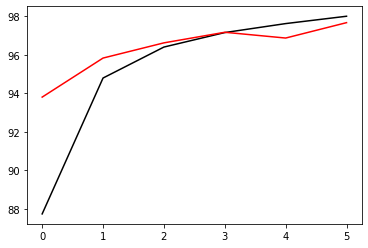

In [11]:
plot(trainAccuracy,'k')
plot(testAccuracy,'r')

For Kernel Size 3:
Epoch [1/6], Step [100/938], Loss: 1.2787
Epoch [1/6], Step [200/938], Loss: 0.7649
Epoch [1/6], Step [300/938], Loss: 0.5765
Epoch [1/6], Step [400/938], Loss: 0.3745
Epoch [1/6], Step [500/938], Loss: 0.5176
Epoch [1/6], Step [600/938], Loss: 0.2009
Epoch [1/6], Step [700/938], Loss: 0.4142
Epoch [1/6], Step [800/938], Loss: 0.5367
Epoch [1/6], Step [900/938], Loss: 0.3283
Train Accuracy of the model on the 60000 train images: 83.30
Test Accuracy of the model on the 10000 test images: 92.55
Epoch [2/6], Step [100/938], Loss: 0.2265
Epoch [2/6], Step [200/938], Loss: 0.1301
Epoch [2/6], Step [300/938], Loss: 0.1817
Epoch [2/6], Step [400/938], Loss: 0.1948
Epoch [2/6], Step [500/938], Loss: 0.2846
Epoch [2/6], Step [600/938], Loss: 0.2573
Epoch [2/6], Step [700/938], Loss: 0.2019
Epoch [2/6], Step [800/938], Loss: 0.2219
Epoch [2/6], Step [900/938], Loss: 0.0995
Train Accuracy of the model on the 60000 train images: 93.50
Test Accuracy of the model on the 10000 test

Epoch [5/6], Step [500/938], Loss: 0.1001
Epoch [5/6], Step [600/938], Loss: 0.0570
Epoch [5/6], Step [700/938], Loss: 0.0939
Epoch [5/6], Step [800/938], Loss: 0.1258
Epoch [5/6], Step [900/938], Loss: 0.0607
Train Accuracy of the model on the 60000 train images: 96.46
Test Accuracy of the model on the 10000 test images: 96.75
Epoch [6/6], Step [100/938], Loss: 0.1399
Epoch [6/6], Step [200/938], Loss: 0.1157
Epoch [6/6], Step [300/938], Loss: 0.0529
Epoch [6/6], Step [400/938], Loss: 0.1190
Epoch [6/6], Step [500/938], Loss: 0.0886
Epoch [6/6], Step [600/938], Loss: 0.1271
Epoch [6/6], Step [700/938], Loss: 0.2154
Epoch [6/6], Step [800/938], Loss: 0.0733
Epoch [6/6], Step [900/938], Loss: 0.1257
Train Accuracy of the model on the 60000 train images: 96.79
Test Accuracy of the model on the 10000 test images: 96.99


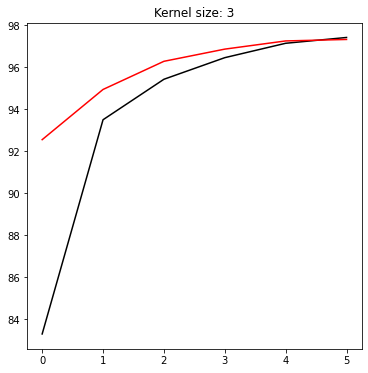

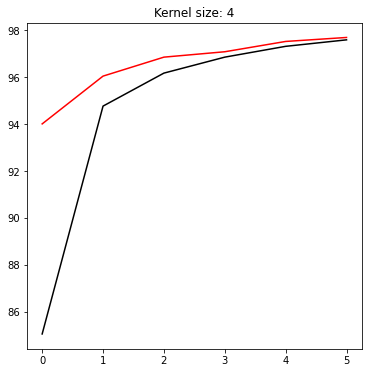

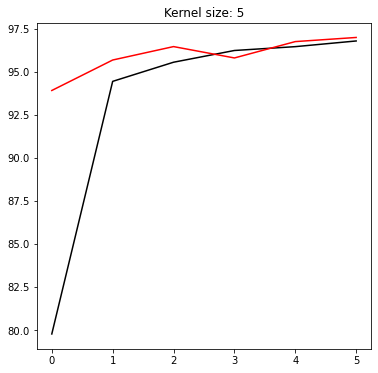

In [12]:
kernelSizes=[3,4,5]

for kernelSize in kernelSizes:
    print(f'For Kernel Size {kernelSize}:')
    trainAccuracy=list()
    testAccuracy=list()
    #instantiate your CNN using kernel size
    model_obj = myCNN(kernelSize)
    #define optimizer and loss function
    loss_func = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model_obj.parameters(), lr = learning_rate, momentum= momentum)
    #train and test - you can copy the code 
    for epoch in range(n_epochs):
        trainAccuracy.append(train(epoch, model_obj, train_loader))
        testAccuracy.append(test(model_obj,test_loader))
    #now plot this
    figure(figsize=(6,6))
    plot(trainAccuracy,'k')
    plot(testAccuracy,'r')
    title("Kernel size: "+str(kernelSize))

myCNN(
  (conv1): Sequential(
    (0): Conv2d(1, 5, kernel_size=(2, 2), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=845, out_features=422, bias=True)
  (out): Linear(in_features=422, out_features=10, bias=True)
)


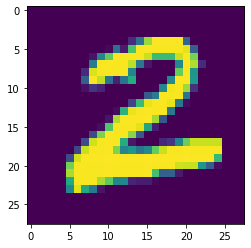

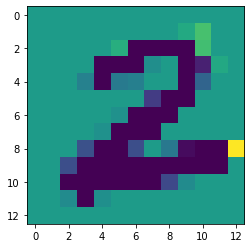

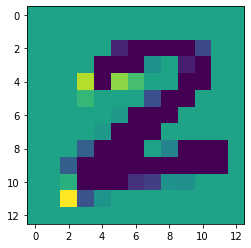

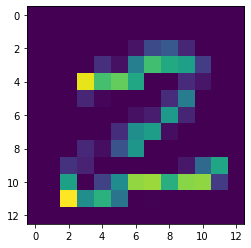

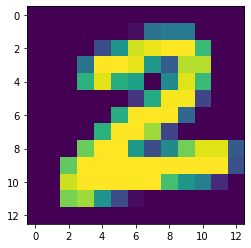

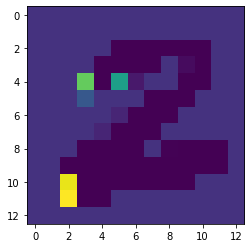

In [15]:
# Test image
for images, labels in train_loader:
    image = images
    break
plt.imshow(image[0][0])

print(model)
num_channels = model.out_channels
model(image)
for channel in range(num_channels):
    plt.figure()
    plt.imshow(model.features.detach().numpy()[0][channel])